# 30917_홍영준_0822_6

In [1]:
import pandas as pd

df = pd.DataFrame({'Var1':[4,3,8],
                  'Var2':[2,6,1]})
df

,Var1,Var2
0,4,2
1,3,6
2,8,1


In [4]:
# Var_sum 열 추가
df['Var_sum'] = df['Var1'] + df['Var2'] # Var_sum 파생변수 만들기
df

,Var1,Var2,Var_sum
0,4,2,6
1,3,6,9
2,8,1,9


In [6]:
# Var_mean 파생변수 만들기
df['Var_mean'] = df['Var_sum'] / 2
df

,Var1,Var2,Var_sum,Var_mean
0,4,2,6,3.0
1,3,6,9,4.5
2,8,1,9,4.5


In [8]:
# mpg 가져오기
mpg = pd.read_csv('mpg.csv')
mpg.head()

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,category
0,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
1,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
2,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact
3,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact
4,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact


In [14]:
# total = (cty + hwy) / 2
mpg['total'] = (mpg['cty'] + mpg['hwy']) / 2 # 통합 연비 변수 만들기
mpg.head()

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,category,total
0,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact,23.5
1,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact,25.0
2,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact,25.5
3,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact,25.5
4,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact,21.0


In [15]:
# 평균 구하는 방법
# sum / n
# .mean
print(sum(mpg['total']) / len(mpg))
print(mpg['total'].mean())

20.14957264957265
20.14957264957265


<Axes: ylabel='Frequency'>

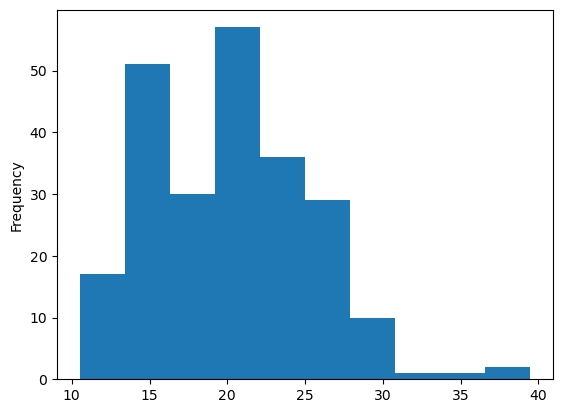

In [17]:
# 그래프 만들기
mpg['total'].plot.hist() # 빈도 수

In [18]:
# 배열을 사용하기 위해 numpy를 불러오기
import numpy as np

In [20]:
# 20 이상이면 pass 그렇지 않으면 fail 부여
mpg['test'] = np.where(mpg['total']>=20, 'pass','fail')
mpg.head()

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,category,total,test
0,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact,23.5,pass
1,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact,25.0,pass
2,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact,25.5,pass
3,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact,25.5,pass
4,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact,21.0,pass


## 빈도표로 합격 판정 자동차 수 살펴보기

In [21]:
# 연비 합격 숫자
mpg['test'].value_counts()

test
pass    128
fail    106
Name: count, dtype: int64

In [23]:
# 막대 그래프로 빈도 표현하기
count_test = mpg['test'].value_counts()

<Axes: xlabel='test'>

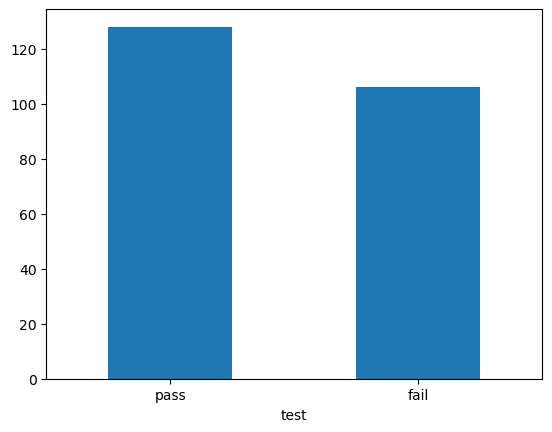

In [25]:
count_test.plot.bar(rot=0) # 축 이름 수평 설정

In [30]:
# total 기준으로 A,B,C 등급 부여
mpg['grade'] = np.where(mpg['total']>=30,'A',
               np.where(mpg['total']>=20,'B','C'))

mpg.head()

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,category,total,test,grade
0,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact,23.5,pass,B
1,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact,25.0,pass,B
2,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact,25.5,pass,B
3,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact,25.5,pass,B
4,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact,21.0,pass,B


In [34]:
# A,B,C 빈도표 만들기
count_grade = mpg['grade'].value_counts()
count_grade

grade
B    118
C    106
A     10
Name: count, dtype: int64

<Axes: xlabel='grade'>

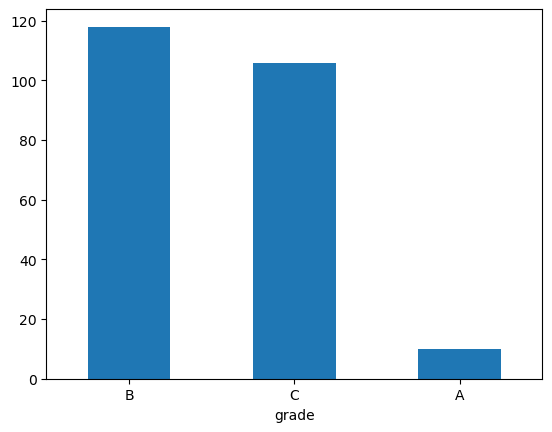

In [37]:
# 등급 빈도 막대 그래프 만들기
count_grade.plot.bar(rot=0) # 축 이름 수평 설정

In [38]:
# 알파벳순 정렬
count_grade = mpg['grade'].value_counts().sort_index()
count_grade

grade
A     10
B    118
C    106
Name: count, dtype: int64

<Axes: xlabel='grade'>

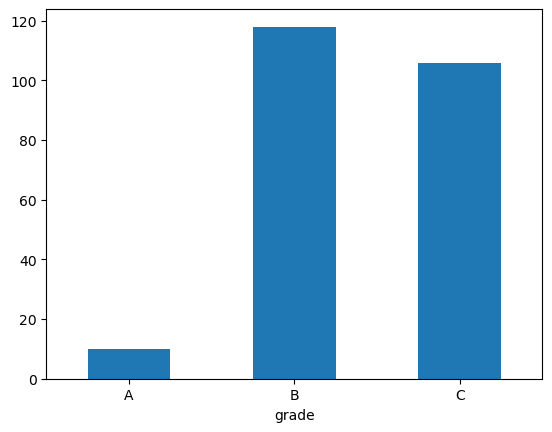

In [39]:
count_grade.plot.bar(rot=0)

In [43]:
# 문제 grade2 = A 30이상, B 25이상, C 20이상 나머지는 D
mpg['grade2'] = np.where(mpg['total']>=30,'A',
                np.where(mpg['total']>=25,'B',
                np.where(mpg['total']>=20,'C','D')))

mpg.head()

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,category,total,test,grade,grade2
0,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact,23.5,pass,B,C
1,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact,25.0,pass,B,B
2,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact,25.5,pass,B,B
3,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact,25.5,pass,B,B
4,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact,21.0,pass,B,C
